<a href="https://colab.research.google.com/github/alwanrahmanas/forecastTraining/blob/main/NBeatsx%20on%20medium_views_published_holiday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [1]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.1 MB/s eta 0:00:00
time: 704 µs (started: 2024-03-30 14:21:55 +00:00)


In [2]:
!pip install neuralforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

# Prep

In [48]:
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt

from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATSx
from neuralforecast.losses.pytorch import MQLoss, DistributionLoss
from neuralforecast.tsdataset import TimeSeriesDataset
from neuralforecast.utils import AirPassengers, AirPassengersPanel, AirPassengersStatic


time: 1.02 ms (started: 2024-03-30 14:41:26 +00:00)


In [6]:
url ='https://raw.githubusercontent.com/marcopeix/time-series-analysis/master/data/medium_views_published_holidays.csv'
data = pd.read_csv(url)

time: 171 ms (started: 2024-03-30 14:25:39 +00:00)


In [19]:
Y_train_df = data[data.ds<data['ds'].values[-12]] # 132 train
Y_test_df = data[data.ds>=data['ds'].values[-12]].reset_index(drop=True) # 12 test

time: 13.4 ms (started: 2024-03-30 14:28:19 +00:00)


In [55]:
Y_train_df['ds'] = pd.to_datetime(Y_train_df['ds'])
Y_test_df['ds'] = pd.to_datetime(Y_test_df['ds'])

time: 19.6 ms (started: 2024-03-30 14:45:11 +00:00)


# Modelling

In [56]:
Y_train_df.iloc[0:15]

,unique_id,ds,y,published,is_holiday
0,0,2020-01-01,1131,0.0,1
1,0,2020-01-02,1764,0.0,0
2,0,2020-01-03,1699,0.0,0
3,0,2020-01-04,1322,0.0,0
4,0,2020-01-05,1491,0.0,0
5,0,2020-01-06,1981,0.0,0
6,0,2020-01-07,2342,0.0,0
7,0,2020-01-08,2110,0.0,0
8,0,2020-01-09,2081,0.0,0
9,0,2020-01-10,1797,0.0,0


time: 21.6 ms (started: 2024-03-30 14:45:16 +00:00)


In [57]:
Y_train_df

,unique_id,ds,y,published,is_holiday
0,0,2020-01-01,1131,0.0,1
1,0,2020-01-02,1764,0.0,0
2,0,2020-01-03,1699,0.0,0
3,0,2020-01-04,1322,0.0,0
4,0,2020-01-05,1491,0.0,0
...,...,...,...,...,...
1364,0,2023-09-26,1352,0.0,0
1365,0,2023-09-27,1296,0.0,0
1366,0,2023-09-28,1093,0.0,0
1367,0,2023-09-29,907,0.0,0


time: 41 ms (started: 2024-03-30 14:45:17 +00:00)


In [233]:
model = NBEATSx(h=12, input_size=24,
                #loss=MQLoss(level=[80, 90]),
                loss=DistributionLoss(distribution='Normal', level=[80, 90]),
                scaler_type='robust',
                dropout_prob_theta=0.01,
                #hist_exog_list=['published','is_holiday'],
                max_steps=128,
                val_check_steps=16,
                early_stop_patience_steps=5)

nf = NeuralForecast(
    models=[model],
    freq='D'
)


INFO:lightning_fabric.utilities.seed:Seed set to 1


time: 42.1 ms (started: 2024-03-30 15:26:33 +00:00)


In [234]:
Y_train_df

,unique_id,ds,y,published,is_holiday
0,0,2020-01-01,1131,0.0,1
1,0,2020-01-02,1764,0.0,0
2,0,2020-01-03,1699,0.0,0
3,0,2020-01-04,1322,0.0,0
4,0,2020-01-05,1491,0.0,0
...,...,...,...,...,...
1364,0,2023-09-26,1352,0.0,0
1365,0,2023-09-27,1296,0.0,0
1366,0,2023-09-28,1093,0.0,0
1367,0,2023-09-29,907,0.0,0


time: 45.1 ms (started: 2024-03-30 15:26:33 +00:00)


In [235]:
Y_test_df

,unique_id,ds,y,published,is_holiday
0,0,2023-10-01,665,0.0,0
1,0,2023-10-02,1176,0.0,0
2,0,2023-10-03,1221,0.0,0
3,0,2023-10-04,1136,0.0,0
4,0,2023-10-05,1037,0.0,0
5,0,2023-10-06,1030,0.0,0
6,0,2023-10-07,583,0.0,0
7,0,2023-10-08,737,0.0,0
8,0,2023-10-09,1237,0.0,1
9,0,2023-10-10,1755,1.0,0


time: 33 ms (started: 2024-03-30 15:26:33 +00:00)


In [236]:
nf.fit(df=Y_train_df, val_size=72)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

time: 45.5 s (started: 2024-03-30 15:26:33 +00:00)


In [237]:
expected_futr_df = nf.make_future_dataframe(df=Y_train_df)



time: 18.3 ms (started: 2024-03-30 15:27:19 +00:00)


In [238]:
Y_hat_df = nf.predict(futr_df=Y_test_df)

Predicting: |          | 0/? [00:00<?, ?it/s]

time: 159 ms (started: 2024-03-30 15:27:19 +00:00)


In [239]:
Y_hat_df

,ds,NBEATSx,NBEATSx-median,NBEATSx-lo-90,NBEATSx-lo-80,NBEATSx-hi-80,NBEATSx-hi-90
unique_id,,,,,,,
0,2023-10-01,792.573914,792.048340,653.049438,686.838745,892.708252,921.279724
0,2023-10-02,1335.280640,1331.786621,1191.326782,1221.861084,1449.937256,1487.645020
0,2023-10-03,1350.927368,1351.200073,1197.947754,1231.935669,1467.434692,1505.498901
0,2023-10-04,1324.394043,1328.119141,1140.717407,1183.463257,1464.973511,1502.422607
0,2023-10-05,1247.905396,1256.494141,970.477295,1032.627197,1459.373657,1505.383911
0,2023-10-06,1080.857056,1080.385376,863.505737,909.885193,1249.349487,1286.841675
0,2023-10-07,688.310547,691.486450,436.457397,494.008728,896.544922,944.396240
0,2023-10-08,823.011108,823.244751,643.184570,680.775879,962.486084,1000.880371
0,2023-10-09,1366.708374,1367.987549,1135.185547,1183.179565,1554.725708,1603.130981


time: 33.1 ms (started: 2024-03-30 15:27:19 +00:00)


In [240]:
Y_test_df

,unique_id,ds,y,published,is_holiday
0,0,2023-10-01,665,0.0,0
1,0,2023-10-02,1176,0.0,0
2,0,2023-10-03,1221,0.0,0
3,0,2023-10-04,1136,0.0,0
4,0,2023-10-05,1037,0.0,0
5,0,2023-10-06,1030,0.0,0
6,0,2023-10-07,583,0.0,0
7,0,2023-10-08,737,0.0,0
8,0,2023-10-09,1237,0.0,1
9,0,2023-10-10,1755,1.0,0


time: 20.6 ms (started: 2024-03-30 15:27:19 +00:00)


In [241]:
merged_df

,unique_id,ds,y,published,is_holiday,NBEATSx,NBEATSx-median,NBEATSx-lo-90,NBEATSx-lo-80,NBEATSx-hi-80,NBEATSx-hi-90
0,0,2023-10-01,665,0.0,0,829.301758,828.240845,547.679871,615.881470,1031.416870,1089.086792
1,0,2023-10-02,1176,0.0,0,1277.549194,1271.479248,1027.474976,1080.518555,1476.728516,1542.233765
2,0,2023-10-03,1221,0.0,0,1291.210449,1291.661621,1038.219360,1094.427124,1483.885376,1546.834473
3,0,2023-10-04,1136,0.0,0,1299.650024,1305.012451,1035.239746,1096.774414,1502.020142,1555.929688
4,0,2023-10-05,1037,0.0,0,1270.312744,1282.186035,886.792603,972.709351,1562.649292,1626.254639
5,0,2023-10-06,1030,0.0,0,1109.944946,1109.289917,808.017822,872.444580,1344.001465,1396.082642
6,0,2023-10-07,583,0.0,0,707.763489,710.826233,464.877899,520.380005,908.583313,954.730896
7,0,2023-10-08,737,0.0,0,802.149292,802.459961,563.068115,613.046082,987.582764,1038.628296
8,0,2023-10-09,1237,0.0,1,1318.739014,1320.568848,987.523315,1056.183350,1587.715820,1656.963989
9,0,2023-10-10,1755,1.0,0,1372.919800,1367.628906,1024.890869,1103.268555,1648.077881,1722.999634


time: 30.4 ms (started: 2024-03-30 15:27:19 +00:00)


if you want to forecast future, remove the 'futr_df'

In [242]:

Y_hat_df = nf.predict(futr_df=expected_futr_df)


Predicting: |          | 0/? [00:00<?, ?it/s]

time: 144 ms (started: 2024-03-30 15:27:19 +00:00)


In [243]:
merged_df = pd.merge(Y_test_df, Y_hat_df, on='ds', suffixes=('_true', '_pred'))
merged_df

,unique_id,ds,y,published,is_holiday,NBEATSx,NBEATSx-median,NBEATSx-lo-90,NBEATSx-lo-80,NBEATSx-hi-80,NBEATSx-hi-90
0,0,2023-10-01,665,0.0,0,792.573914,792.048340,653.049438,686.838745,892.708252,921.279724
1,0,2023-10-02,1176,0.0,0,1335.280640,1331.786621,1191.326782,1221.861084,1449.937256,1487.645020
2,0,2023-10-03,1221,0.0,0,1350.927368,1351.200073,1197.947754,1231.935669,1467.434692,1505.498901
3,0,2023-10-04,1136,0.0,0,1324.394043,1328.119141,1140.717407,1183.463257,1464.973511,1502.422607
4,0,2023-10-05,1037,0.0,0,1247.905396,1256.494141,970.477295,1032.627197,1459.373657,1505.383911
5,0,2023-10-06,1030,0.0,0,1080.857056,1080.385376,863.505737,909.885193,1249.349487,1286.841675
6,0,2023-10-07,583,0.0,0,688.310547,691.486450,436.457397,494.008728,896.544922,944.396240
7,0,2023-10-08,737,0.0,0,823.011108,823.244751,643.184570,680.775879,962.486084,1000.880371
8,0,2023-10-09,1237,0.0,1,1366.708374,1367.987549,1135.185547,1183.179565,1554.725708,1603.130981
9,0,2023-10-10,1755,1.0,0,1322.379883,1318.722656,1081.806519,1135.984619,1512.581665,1564.370850


time: 52.9 ms (started: 2024-03-30 15:27:19 +00:00)


In [244]:
# filtered_df = merged_df[merged_df['unique_id'] != 'Airline2']
# filtered_df

time: 439 µs (started: 2024-03-30 15:27:19 +00:00)


# Eval

In [245]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate RMSE, MAPE, and MAE for each column
results = {}
for column in ['NBEATSx', 'NBEATSx-median', 'NBEATSx-lo-90', 'NBEATSx-lo-80', 'NBEATSx-hi-80', 'NBEATSx-hi-90']:
    rmse = np.sqrt(mean_squared_error(merged_df['y'], merged_df[column]))
    mape = mean_absolute_percentage_error(merged_df['y'], merged_df[column])
    mae = mean_absolute_error(merged_df['y'], merged_df[column])
    results[column] = {'RMSE': rmse, 'MAPE': mape, 'MAE': mae}

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).T


time: 7 ms (started: 2024-03-30 15:27:19 +00:00)


In [246]:
# Find the column with the smallest value for each metric
best_rmse_column = results_df['RMSE'].idxmin()
best_mape_column = results_df['MAPE'].idxmin()
best_mae_column = results_df['MAE'].idxmin()

# Print the results
print("Column with the smallest RMSE:", best_rmse_column)
print("Column with the smallest MAPE:", best_mape_column)
print("Column with the smallest MAE:", best_mae_column)


Column with the smallest RMSE: NBEATSx-hi-90
Column with the smallest MAPE: NBEATSx-lo-80
Column with the smallest MAE: NBEATSx
time: 5.89 ms (started: 2024-03-30 15:27:19 +00:00)


## Visualize

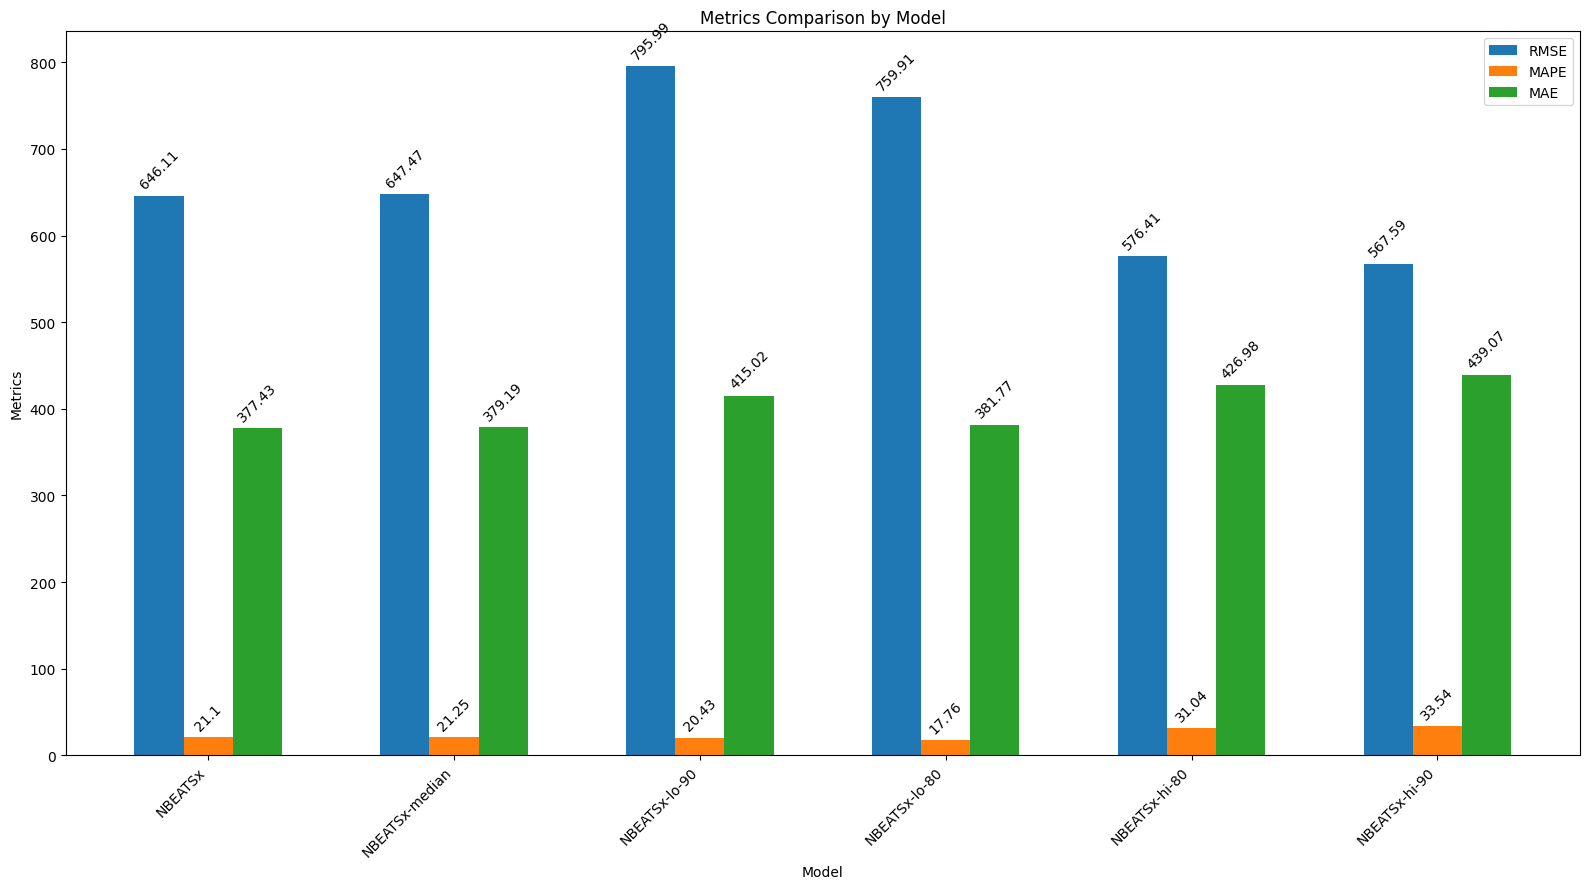

time: 515 ms (started: 2024-03-30 15:27:19 +00:00)


In [247]:
import matplotlib.pyplot as plt
import numpy as np

# Define figure and axis
fig, ax = plt.subplots(figsize=(16, 9))

# Define bar width
bar_width = 0.2

# Define positions for bars
index = np.arange(len(results_df))

# Plot bars for each metric
rects1 = ax.bar(index - bar_width, results_df['RMSE'], bar_width, label='RMSE')
rects2 = ax.bar(index, results_df['MAPE'], bar_width, label='MAPE')
rects3 = ax.bar(index + bar_width, results_df['MAE'], bar_width, label='MAE')

# Add exact values at the top of each bar with 45-degree rotation
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=45)  # Rotate the text by 45 degrees

# Customize the plot
ax.set_xlabel('Model')
ax.set_ylabel('Metrics')
ax.set_title('Metrics Comparison by Model')
ax.set_xticks(index)
ax.set_xticklabels(results_df.index, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()
